Praktikum Week 6
Ricky Jonathan H. T - 0706022210005


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Step 2: Load dataset dari URL
url = "https://raw.githubusercontent.com/Zwelious/DM_W2/main/diabetes.csv"
data = pd.read_csv(url)  # Membaca file CSV dan memuatnya sebagai DataFrame
print("Data Sample:")
print(data.head())

Data Sample:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


-Dataset memiliki 768 entri, yang berarti ada 768 baris data, dimulai dari indeks 0 hingga 767.

Nama Kolom dan Jumlah Nilai Non-null:

-Setiap kolom ditampilkan bersama dengan jumlah nilai non-null. Semua kolom memiliki 768 nilai non-null, yang berarti tidak ada nilai yang hilang (missing values) di dataset ini.

Tipe Data (Dtype):

-Kolom-kolom dalam dataset memiliki dua tipe data yang berbeda:
int64: Tipe data integer, digunakan untuk kolom seperti Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, dan Outcome.
float64: Tipe data floating point (angka desimal), digunakan untuk kolom BMI dan DiabetesPedigreeFunction.


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Insights dari Hasil describe():
Potensi Outliers:

-Beberapa kolom seperti Insulin, SkinThickness, dan BMI memiliki nilai minimum yang sangat rendah (bahkan nol), yang tampaknya tidak realistis dalam konteks medis. Ini bisa menjadi indikasi data yang hilang atau outlier yang perlu diatasi selama preprocessing.
Distribusi Kadar Glukosa:

-Kadar glukosa memiliki nilai rata-rata 120.89 dengan standar deviasi 31.97, yang menunjukkan adanya variasi yang cukup besar. Beberapa individu mungkin memiliki kadar glukosa yang sangat tinggi atau sangat rendah.
Distribusi Umur:

-Usia rata-rata di dataset ini adalah 33.24 tahun dengan standar deviasi 11.76. Nilai minimum adalah 21 tahun dan maksimum adalah 81 tahun, yang menunjukkan rentang usia yang cukup luas.
Outcome:

-Kolom Outcome adalah variabel target dengan dua nilai unik: 0 dan 1, di mana 0 berarti tidak memiliki diabetes, dan 1 berarti memiliki diabetes. Nilai rata-rata Outcome adalah 0.34, yang berarti sekitar 34% individu dalam dataset ini didiagnosis menderita diabetes.

In [9]:
# Menampilkan jumlah nilai unik dari setiap kolom
unique_counts = data.nunique()
print("Jumlah nilai unik di setiap kolom:\n", unique_counts)

# Menampilkan daftar nilai unik untuk setiap kolom (opsional)
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\nNilai unik pada kolom {column}:\n{unique_values}")


Jumlah nilai unik di setiap kolom:
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Nilai unik pada kolom Pregnancies:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Nilai unik pada kolom Glucose:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 14

Dari output yang dicetak, kita bisa melihat jumlah nilai unik di setiap kolom. Jumlah ini membantu mengetahui berapa banyak variasi yang ada dalam kolom-kolom dataset. Misalnya, kolom DiabetesPedigreeFunction mungkin memiliki beberapa nilai unik yang merepresentasikan variasi genetik.

In [11]:
data_cleaned = data.dropna()

print("Null values per column after dropna:\n", data_cleaned.isnull().sum())


Null values per column after dropna:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Mengecek apakah ada null value, jika ada kita drop


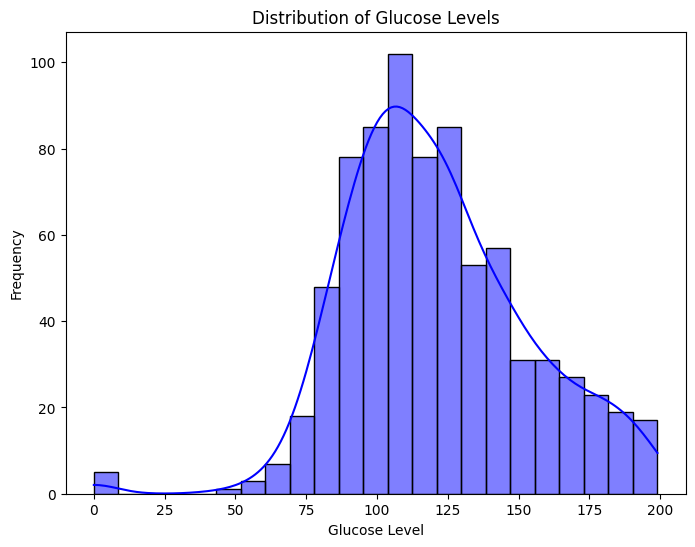

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


Histogram ini menggambarkan distribusi kadar glukosa pada pasien. Dari plot ini, kita bisa melihat apakah data mengikuti distribusi normal atau miring ke kiri/kanan.
Distribusi kadar glukosa dapat memberi gambaran tentang batas normal dan anomali dalam dataset.
Berdasarkan histogram pada grafik distribusi tingkat glukosa:

Sebagian besar data berkumpul di sekitar nilai glukosa antara 75 dan 125, menunjukkan bahwa nilai glukosa di rentang ini adalah yang paling umum.
Distribusi tampak mendekati distribusi normal (berbentuk lonceng) dengan sedikit skewness ke kanan, di mana beberapa individu memiliki tingkat glukosa yang lebih tinggi (di atas 150).
Frekuensi tertinggi (puncak) ada di kisaran nilai glukosa sekitar 100-110.
Ada nilai glukosa yang lebih rendah di bawah 50, namun jumlahnya sangat kecil.


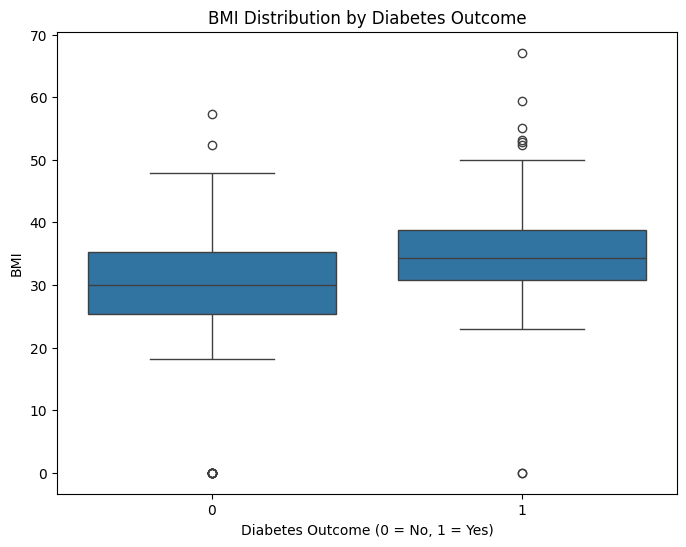

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=data_cleaned)
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


Boxplot ini menunjukkan distribusi BMI untuk dua kelompok: mereka yang memiliki diabetes (Outcome = 1) dan yang tidak (Outcome = 0).
Kita dapat melihat apakah ada perbedaan signifikan dalam BMI antara kedua kelompok, serta melihat potensi outliers dalam data.

Berikut beberapa kesimpulan dari plot tersebut:

Median BMI:

Individu tanpa diabetes (0) memiliki median BMI yang sedikit lebih rendah dibandingkan dengan individu dengan diabetes (1). Ini menunjukkan bahwa individu dengan diabetes cenderung memiliki BMI yang lebih tinggi.
Variasi BMI:

Kedua kelompok memiliki kisaran BMI yang relatif sama, tetapi terdapat beberapa outliers pada kedua kelompok, terutama di kelompok non-diabetes. Ada outlier dengan BMI lebih rendah dan lebih tinggi yang menonjol di kedua kelompok.
Penyebaran BMI:

Rentang interkuartil (IQR) pada kedua kelompok hampir sama, dengan sebagian besar nilai BMI pada individu yang memiliki atau tidak memiliki diabetes berada dalam kisaran sekitar 25-40.

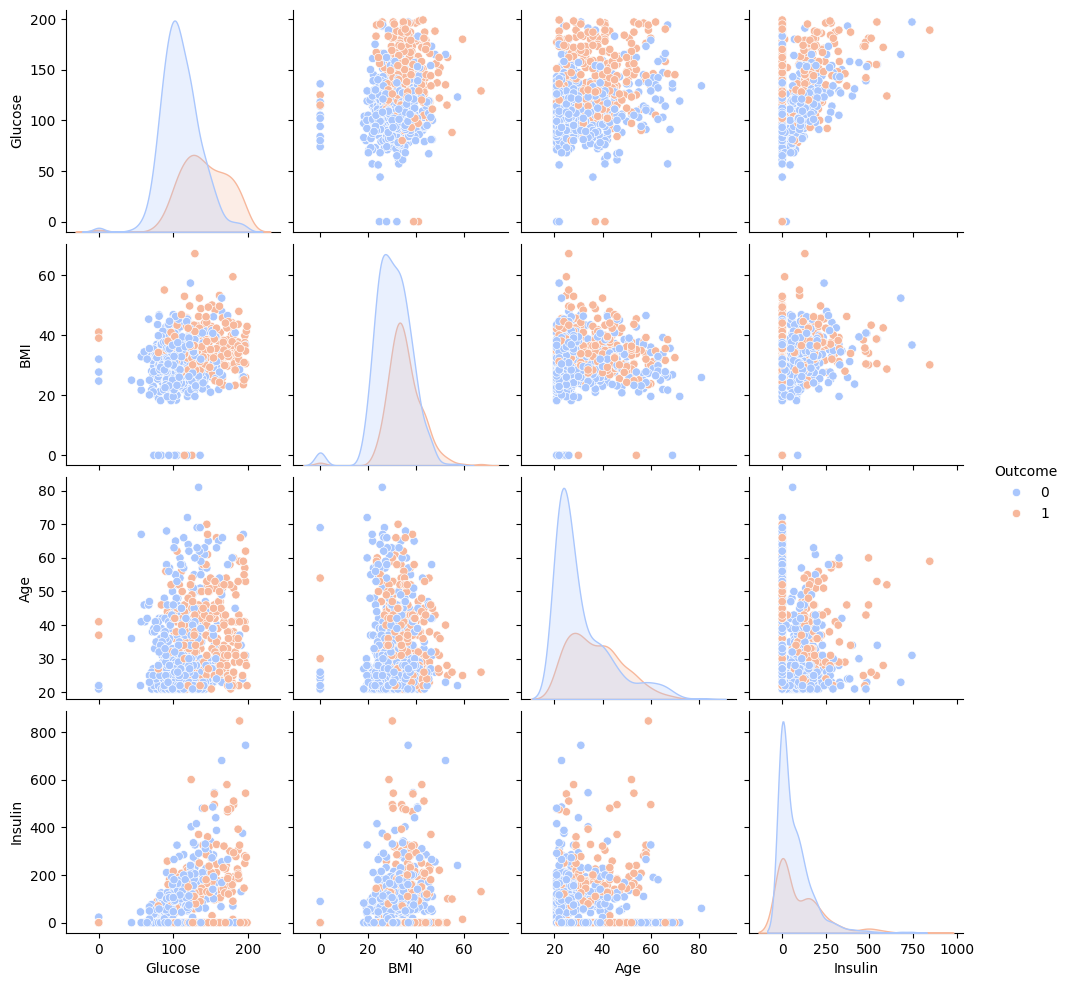

In [16]:
sns.pairplot(data_cleaned[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', palette='coolwarm')
plt.show()


1. Distribusi Glucose:
Di sudut kiri atas, distribusi Glucose tampak lebih tinggi pada pasien yang memiliki diabetes (Outcome = 1) dibandingkan dengan yang tidak (Outcome = 0).
Ini mengindikasikan bahwa kadar glukosa lebih tinggi pada orang dengan diabetes.
2. Hubungan BMI dan Glucose:
Scatter plot antara BMI dan Glucose menunjukkan bahwa pasien dengan diabetes (Outcome = 1) cenderung memiliki nilai Glucose yang lebih tinggi.
Namun, tidak ada korelasi yang kuat antara BMI dan Outcome.
3. Distribusi Umur (Age):
Distribusi Age (umur) menunjukkan bahwa usia pasien dengan diabetes lebih tersebar, sementara yang tanpa diabetes lebih terkonsentrasi di usia lebih muda.
Tampaknya pasien yang lebih tua memiliki kemungkinan lebih besar terkena diabetes.
4. Hubungan Insulin dan Glucose:
Scatter plot antara Insulin dan Glucose memperlihatkan pola yang sedikit kabur, namun beberapa pasien dengan diabetes memiliki kadar Insulin yang lebih tinggi dibandingkan dengan pasien non-diabetes.
Kesimpulannya
glukosa merupakan faktor yang cukup signifikan dalam menentukan Outcome.
Terdapat beberapa pola yang dapat diidentifikasi dari fitur-fitur lainnya seperti Age dan BMI, meskipun korelasinya mungkin tidak terlalu kuat.

Decision Tree


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Split data into features (X) and target (y)
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Decision Tree with Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)




DecisionTreeClassifier(random_state=42)

In [20]:
# Model 2: Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [21]:
# Predicting with Gini Index
y_pred_gini = dt_gini.predict(X_test)

# Predicting with Entropy
y_pred_entropy = dt_entropy.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score

# Accuracy for Gini Index
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy using Gini Index: {accuracy_gini}")

# Accuracy for Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy using Entropy: {accuracy_entropy}")


Accuracy using Gini Index: 0.7012987012987013
Accuracy using Entropy: 0.7272727272727273


In [23]:
# Check training accuracy for Gini Index
train_accuracy_gini = accuracy_score(y_train, dt_gini.predict(X_train))
print(f"Training Accuracy (Gini Index): {train_accuracy_gini}")

# Check training accuracy for Entropy
train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
print(f"Training Accuracy (Entropy): {train_accuracy_entropy}")


Training Accuracy (Gini Index): 1.0
Training Accuracy (Entropy): 1.0


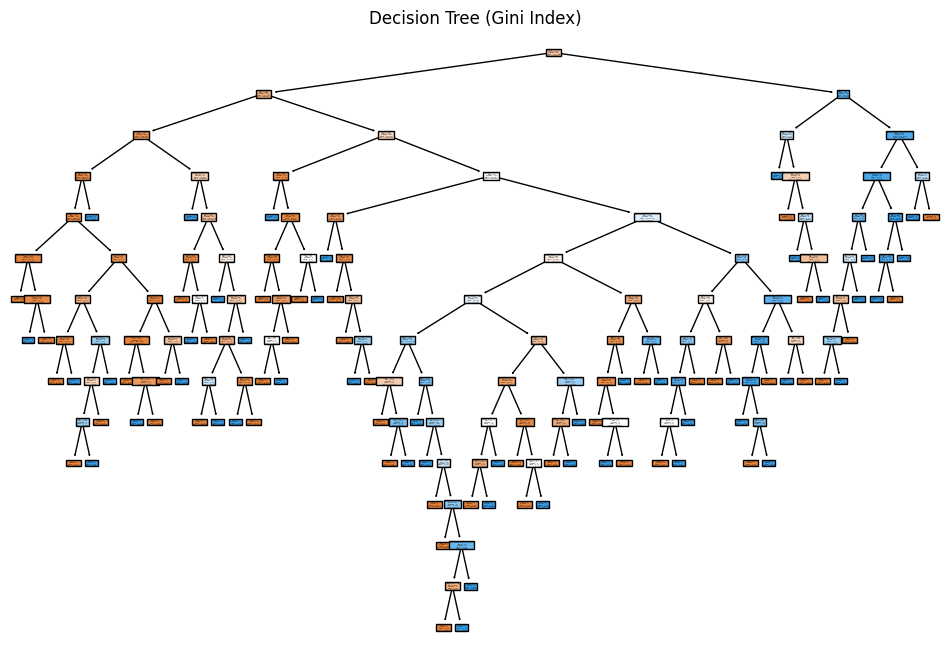

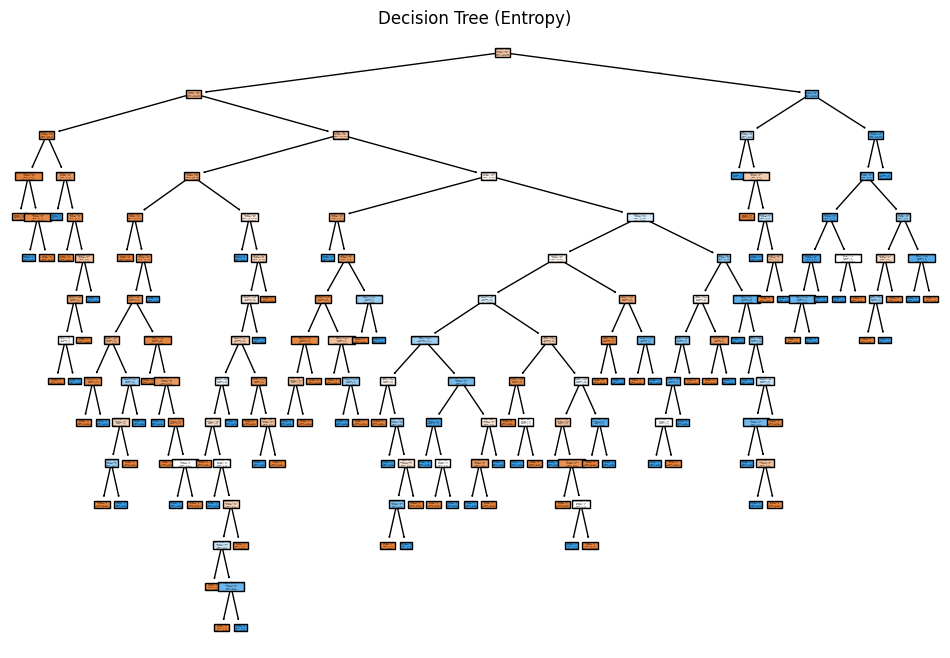

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the Decision Tree with Gini Index
plt.figure(figsize=(12, 8))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree (Gini Index)')
plt.show()

# Visualizing the Decision Tree with Entropy
plt.figure(figsize=(12, 8))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree (Entropy)')
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Gini Index
cm_gini = confusion_matrix(y_test, y_pred_gini)
print(f"Confusion Matrix (Gini Index):\n{cm_gini}")

# Confusion Matrix for Entropy
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print(f"Confusion Matrix (Entropy):\n{cm_entropy}")


Confusion Matrix (Gini Index):
[[107  44]
 [ 25  55]]
Confusion Matrix (Entropy):
[[118  33]
 [ 30  50]]


In [26]:
from sklearn.metrics import classification_report

# Classification Report for Gini Index
print("Classification Report (Gini Index):\n", classification_report(y_test, y_pred_gini))

# Classification Report for Entropy
print("Classification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))


Classification Report (Gini Index):
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.60      0.62      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



1. Decision Tree (Gini Index):
Kelas 0 (non-diabetes): Model ini memiliki kinerja yang lebih baik untuk prediksi non-diabetes, dengan precision sebesar 0.81 dan f1-score 0.76.
Kelas 1 (diabetes): Kinerjanya kurang optimal, precision hanya 0.56 dan f1-score 0.61, yang menunjukkan bahwa model sering salah dalam mengidentifikasi orang dengan diabetes.
Akurasi total: 70%. Secara keseluruhan, model lebih baik dalam memprediksi non-diabetes daripada diabetes, dengan nilai rata-rata f1-score sebesar 0.71.
2. Decision Tree (Entropy):
Kelas 0 (non-diabetes): Precision sebesar 0.80 dan f1-score 0.79, menunjukkan bahwa model sangat baik dalam memprediksi orang tanpa diabetes.
Kelas 1 (diabetes): Meski precision sedikit lebih tinggi daripada Gini Index (0.60), f1-score tetap rendah pada 0.61.
Akurasi total: 73%. Sedikit lebih baik daripada Gini Index, dengan rata-rata f1-score sebesar 0.73.


Kesimpulan Akhir:
Entropy memberikan performa yang sedikit lebih baik dibandingkan Gini Index, terutama dalam hal akurasi dan f1-score keseluruhan. Namun, kedua model masih kesulitan dalam memprediksi pasien dengan diabetes (Kelas 1), terlihat dari rendahnya precision dan f1-score untuk kelas tersebut.
Kedua model cenderung lebih baik dalam mengklasifikasikan orang tanpa diabetes (Kelas 0), sementara performanya kurang optimal untuk mengidentifikasi penderita diabetes (Kelas 1).

Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [28]:
# Predicting with Naive Bayes
y_pred_nb = nb_model.predict(X_test)


In [29]:
# Accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")


Naive Bayes Accuracy: 0.7445887445887446


In [30]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix (Naive Bayes):\n{cm_nb}")


Confusion Matrix (Naive Bayes):
[[119  32]
 [ 27  53]]


In [31]:
# Classification Report for Naive Bayes
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



Kelas 0 (Non-Diabetes):

Precision: 0.82 – Model cukup baik dalam memprediksi orang tanpa diabetes. Dari semua yang diprediksi sebagai non-diabetes, 82% benar.
Recall: 0.79 – Dari total orang non-diabetes, 79% berhasil terdeteksi dengan benar.
F1-Score: 0.80 – Kombinasi antara precision dan recall menunjukkan model cukup andal dalam memprediksi kelas non-diabetes.
Kelas 1 (Diabetes):

Precision: 0.62 – Hanya 62% dari semua prediksi diabetes yang benar-benar positif.
Recall: 0.66 – Dari total orang yang benar-benar memiliki diabetes, 66% berhasil terdeteksi oleh model.
F1-Score: 0.64 – Kombinasi antara precision dan recall untuk kelas diabetes menunjukkan performa yang sedang.
Akurasi Keseluruhan: 74% – Secara keseluruhan, model memiliki tingkat akurasi 74%.

Macro Average: 0.72 untuk precision, recall, dan f1-score, yang menandakan performa seimbang rata-rata di antara kedua kelas.

Weighted Average: 0.75 untuk precision dan f1-score, menekankan bahwa model lebih cenderung fokus pada prediksi yang lebih baik untuk kelas mayoritas (non-diabetes).


Kesimpulan Akhir:
Naive Bayes memiliki akurasi keseluruhan 74%, sedikit lebih tinggi dibandingkan Decision Tree (Gini dan Entropy) dalam hal akurasi.
Kelebihan: Naive Bayes bekerja baik untuk prediksi kelas non-diabetes dengan precision 0.82 dan f1-score 0.80.
Kekurangan: Seperti Decision Tree, model masih kesulitan dalam memprediksi pasien diabetes, terbukti dari precision yang lebih rendah (0.62) dan f1-score (0.64) untuk kelas diabetes.

SVM (Support Vector Machine)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Prediksi menggunakan model SVM
y_pred_svm = svm_model.predict(X_test)

# Menghitung akurasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Menampilkan confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix (SVM):\n{cm_svm}")

# Menampilkan classification report untuk SVM
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7445887445887446
Confusion Matrix (SVM):
[[122  29]
 [ 30  50]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Kelas 0 (Non-Diabetes):

Precision: 0.80 – Dari semua prediksi yang mengatakan non-diabetes, 80% benar.
Recall: 0.81 – Dari total orang non-diabetes, 81% berhasil terdeteksi dengan benar.
F1-Score: 0.81 – Kombinasi antara precision dan recall menunjukkan bahwa model ini cukup baik dalam memprediksi non-diabetes.
Kelas 1 (Diabetes):

Precision: 0.63 – Dari semua prediksi yang mengatakan diabetes, 63% benar.
Recall: 0.62 – Dari semua orang yang benar-benar memiliki diabetes, 62% berhasil dideteksi oleh model.
F1-Score: 0.63 – Kombinasi antara precision dan recall untuk kelas diabetes, menunjukkan performa yang cukup, meskipun masih bisa ditingkatkan.
Akurasi Keseluruhan: 74.46% – SVM memberikan akurasi yang hampir sama dengan model Naive Bayes.

Macro Average: 0.72 untuk precision, recall, dan f1-score, menunjukkan keseimbangan performa untuk kedua kelas.

Weighted Average: 0.74, yang mirip dengan Naive Bayes dan menunjukkan bahwa model ini lebih fokus pada kelas mayoritas (non-diabetes).

Kesimpulan Akhir:
SVM menunjukkan akurasi keseluruhan yang sebanding dengan Naive Bayes (sekitar 74%) dan Decision Tree. Kinerjanya sangat baik untuk memprediksi orang non-diabetes (kelas 0), tetapi masih menghadapi tantangan untuk mendeteksi orang dengan diabetes (kelas 1).
Kelas 1 (Diabetes) masih menjadi tantangan besar di semua model, dengan precision dan recall di kisaran 0.62 hingga 0.63 untuk SVM.

**Kesimpulan Akhir**
Kesimpulan Perbandingan dari 3 Model (Decision Tree, Naive Bayes, dan SVM):
1. Decision Tree (Gini Index & Entropy):
Akurasi: 70% (Gini Index) dan 73% (Entropy).
Kinerja Kelas 0 (Non-Diabetes):
Precision tinggi (0.80+), menunjukkan model mampu memprediksi orang non-diabetes dengan baik.
Recall dan f1-score juga cukup baik (sekitar 0.76-0.79).
Kinerja Kelas 1 (Diabetes):
Precision lebih rendah (0.56-0.60) dan f1-score di kisaran 0.61, menandakan kesulitan dalam memprediksi pasien diabetes.
Kesimpulan: Decision Tree baik untuk kelas mayoritas (non-diabetes), tetapi kesulitan dengan kelas minoritas (diabetes). Model dengan Entropy sedikit lebih baik daripada Gini Index.
2. Naive Bayes:
Akurasi: 74%, sedikit lebih baik dari Decision Tree.
Kinerja Kelas 0 (Non-Diabetes):
Precision dan f1-score cukup tinggi (sekitar 0.80), menunjukkan model ini juga baik untuk memprediksi orang non-diabetes.
Kinerja Kelas 1 (Diabetes):
Precision untuk kelas diabetes lebih baik dari Decision Tree (0.62), tetapi f1-score masih di kisaran 0.64, menunjukkan bahwa model ini juga menghadapi tantangan serupa dalam memprediksi pasien diabetes.
Kesimpulan: Naive Bayes lebih cepat dan sederhana, memberikan akurasi yang lebih tinggi daripada Decision Tree, tetapi masih kurang dalam memprediksi kelas diabetes.
3. Support Vector Machine (SVM):
Akurasi: 74.46%, sebanding dengan Naive Bayes.
Kinerja Kelas 0 (Non-Diabetes):
Precision tinggi (0.80), recall dan f1-score juga berada di kisaran 0.81.
Kinerja Kelas 1 (Diabetes):
Precision (0.63) dan f1-score (0.63), hampir sama dengan Naive Bayes. Model ini menunjukkan kesulitan yang sama dalam memprediksi pasien diabetes.
Kesimpulan: SVM memberikan hasil yang stabil dan akurasi yang sama dengan Naive Bayes, tetapi performanya terhadap kelas diabetes masih bisa ditingkatkan.


Kesimpulan Utama:
Kelas Non-Diabetes (Kelas 0): Semua model (Decision Tree, Naive Bayes, dan SVM) memberikan hasil yang baik untuk prediksi non-diabetes, dengan precision, recall, dan f1-score yang tinggi.
Kelas Diabetes (Kelas 1): Semua model berjuang dalam memprediksi pasien diabetes, dengan precision dan f1-score yang cukup rendah (sekitar 0.60-0.64).
Akurasi: Naive Bayes dan SVM menunjukkan akurasi yang sedikit lebih baik (~ 74%) dibandingkan Decision Tree (~ 70-73%).